In [28]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

file_path = '../prepared_data_files/processed_customers.csv'
data = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
data.head()

,fraudulent,countryIP,countryCodeIP,latIP,lonIP,latBillingAddress,lonBillingAddress,is_free_domain,num_orders,avg_order_amount,min_order_amount,max_order_amount,num_fulfilled_orders,num_failed_orders,num_pending_orders,num_unique_shipping_addresses,type_apple pay,type_card,type_paypal,type_bitcoin,provider_American Express,provider_VISA 16 digit,provider_VISA 13 digit,provider_Maestro,provider_JCB 15 digit,provider_Mastercard,provider_Voyager,provider_Diners Club / Carte Blanche,provider_Discover,provider_JCB 16 digit,unique_issuers,registration_failure_rate,total_transaction_amount,avg_transaction_amount,min_transaction_amount,max_transaction_amount,num_transactions,num_failed_transactions,failure_rate_transactions,geo_distance
0,0,China,CN,22.5559,114.05770,45.493512,-73.589353,1,2,22.00,18,26,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,100.00,44,22.00,18,26,2,0,0.00,12408.839815
1,1,Japan,JP,35.6629,139.76100,46.373600,-87.417651,1,3,37.00,23,45,3,0,0,3,0,1,0,1,1,1,0,1,0,1,0,1,0,1,6,14.29,111,37.00,23,45,3,1,33.33,9746.278413
2,0,Switzerland,CH,46.9219,7.16595,48.475798,-0.307036,1,3,27.33,24,33,2,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,1,2,0.00,131,26.20,24,33,5,2,40.00,585.057779
3,0,Switzerland,CH,46.9219,7.16595,9.160894,-79.843836,1,3,28.33,25,34,3,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.00,85,28.33,25,34,3,0,0.00,9038.844082
4,1,Morocco,MA,35.5755,-5.37090,45.804479,-76.126439,0,7,58.71,32,71,6,1,0,2,1,1,0,0,1,1,1,0,0,0,0,0,0,1,4,0.00,411,58.71,32,71,7,2,28.57,5875.937107


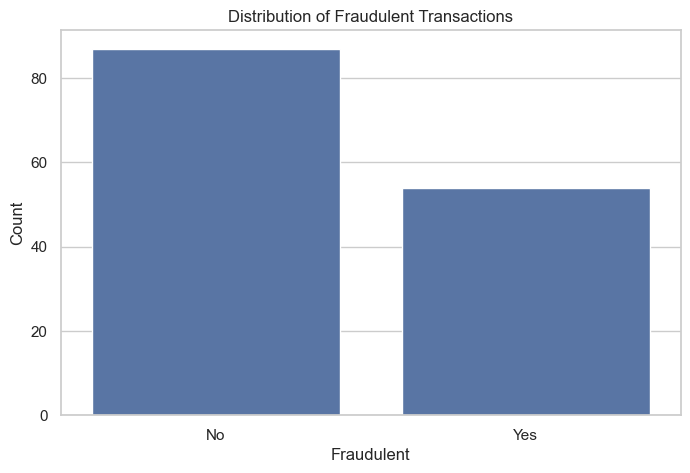

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of the 'fraudulent' variable
plt.figure(figsize=(8, 5))
sns.countplot(x='fraudulent', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [30]:
data['fraudulent'].value_counts(normalize=True) * 100

fraudulent
0    61.702128
1    38.297872
Name: proportion, dtype: float64

38% of the customers are fraudulent. There is not a huge imbalance in the dataset.

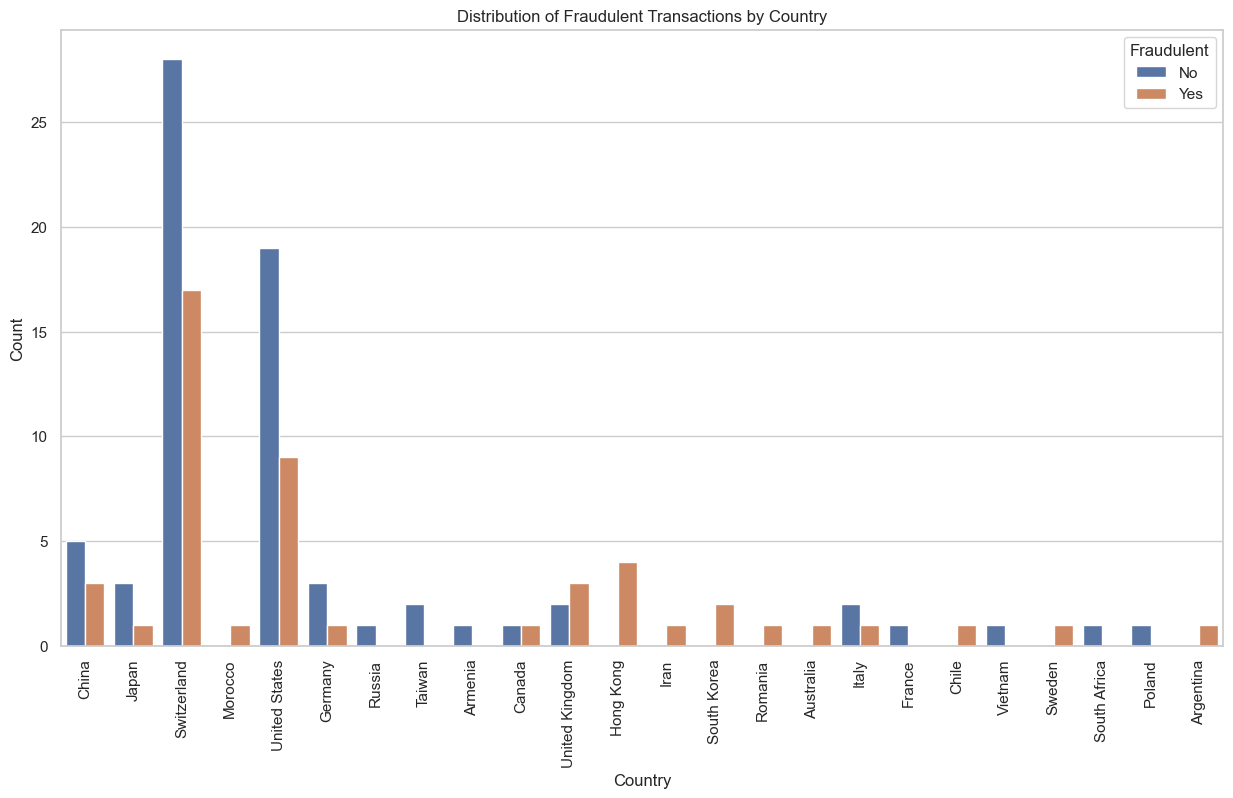

In [31]:
plt.figure(figsize=(15, 8))
sns.countplot(x='countryIP', hue='fraudulent', data=data)
plt.title('Distribution of Fraudulent Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()


## Analysis of the numerical variables

In [32]:
# List of numerical variables to analyze
numerical_vars = [
    'num_orders', 'avg_order_amount', 'min_order_amount',
       'max_order_amount', 'num_fulfilled_orders', 'num_failed_orders',
       'num_pending_orders', 'num_unique_shipping_addresses','unique_issuers', 'registration_failure_rate',
       'total_transaction_amount', 'avg_transaction_amount',
       'min_transaction_amount', 'max_transaction_amount', 'num_transactions',
       'num_failed_transactions', 'failure_rate_transactions', 'geo_distance'
]

# Grouping by the 'fraudulent' variable and calculating mean and median for numerical variables
grouped_data_mean = data.groupby('fraudulent')[numerical_vars].mean()
grouped_data_median = data.groupby('fraudulent')[numerical_vars].median()

# grouped_data_mean,
grouped_data_median





,num_orders,avg_order_amount,min_order_amount,max_order_amount,num_fulfilled_orders,num_failed_orders,num_pending_orders,num_unique_shipping_addresses,unique_issuers,registration_failure_rate,total_transaction_amount,avg_transaction_amount,min_transaction_amount,max_transaction_amount,num_transactions,num_failed_transactions,failure_rate_transactions,geo_distance
fraudulent,,,,,,,,,,,,,,,,,,
0,3.0,29.5,16.0,40.0,3.0,0.0,0.0,1.0,1.0,0.0,117.0,28.8,16.0,40.0,4.0,1.0,20.000,5248.603835
1,4.0,37.5,30.0,46.5,3.0,0.0,0.0,2.0,2.0,0.0,148.0,37.0,30.0,46.5,4.5,1.0,18.335,6967.601791


The median seems to be more approriate for summarizing the numerical variables because the mean is more sensitive to extrem values and outliers, while the median provides a better measure of central tendency when the data is skewed.



<u>Number of Orders (num_orders):</u>

Median number of orders is higher in fraudulent transactions (4) compared to non-fraudulent transactions (3).

<u>Average Order Amount (avg_order_amount):</u>

Fraudulent transactions have a higher median average order amount (37.5) than non-fraudulent ones (29.5).

<u>Minimum Order Amount (min_order_amount):</u>

The median minimum order amount is higher in fraudulent transactions (30) compared to non-fraudulent ones (16). This suggests that fraudulent transactions tend to have a higher minimum spending level.

<u>Maximum Order Amount (max_order_amount):</u>

Fraudulent transactions have a higher median maximum order amount (46.5) compared to non-fraudulent transactions (40). This indicates that fraudulent transactions might involve larger individual order sizes.

<u>Number of Fulfilled Orders (num_fulfilled_orders):</u>

The median number of fulfilled orders is the same (3) for both fraudulent and non-fraudulent transactions. This suggests that the fulfillment rate does not significantly differ between the two types.

<u>Number of Failed Orders (num_failed_orders):</u>

Both types of transactions show a median of 0 failed orders, indicating that the presence of failed orders might not be a distinguishing factor between fraudulent and non-fraudulent transactions.

<u>Number of Pending Orders (num_pending_orders):</u>

The median number of pending orders is 0 for both fraudulent and non-fraudulent transactions, suggesting that this variable does not differentiate between the two types.

<u>Number of Unique Shipping Addresses (num_unique_shipping_addresses):</u>

Fraudulent transactions have a higher median number of unique shipping addresses (2) compared to non-fraudulent transactions (1). This could imply that fraudulent transactions are more likely to involve multiple shipping destinations.

<u>Number of Unique Issuers (unique_issuers):</u>

The median number of unique card issuers is higher in fraudulent transactions (2) than in non-fraudulent ones (1), indicating that fraudulent activities might involve using a variety of card issuers.

<u>Registration Failure Rate (registration_failure_rate):</u>

Both fraudulent and non-fraudulent transactions have a median registration failure rate of 0, suggesting this metric does not vary significantly between the two groups.

<u>Total Transaction Amount (total_transaction_amount):</u>

The median total transaction amount is higher in fraudulent transactions (148) compared to non-fraudulent transactions (117), suggesting that fraudulent activities may involve higher overall spending.

<u>Average Transaction Amount (avg_transaction_amount):</u>

Similar to the average order amount, fraudulent transactions have a higher median average transaction amount (37) compared to non-fraudulent ones (28.8).

<u>Minimum Transaction Amount (min_transaction_amount):</u>

The median minimum transaction amount is higher in fraudulent transactions (30) than in non-fraudulent transactions (16), echoing the pattern observed in order amounts.

<u>Maximum Transaction Amount (max_transaction_amount):</u>

Fraudulent transactions show a higher median maximum transaction amount (46.5) compared to non-fraudulent transactions (40).

<u>Number of Transactions (num_transactions):</u>

Fraudulent transactions have a slightly higher median number of transactions (4.5) compared to non-fraudulent transactions (4).

<u>Number of Failed Transactions (num_failed_transactions):</u>

The median number of failed transactions is the same (1) for both fraudulent and non-fraudulent transactions.

<u>Failure Rate of Transactions (failure_rate_transactions):</u>

The median failure rate of transactions is 20% for non-fraudulent transactions and 18.8 for fraudulent transactions.

<u>Geographical Distance (geo_distance):</u>

The median geographical distance is higher in fraudulent transactions (6967.60) compared to non-fraudulent transactions (5138), suggesting that fraudulent activities have a larger distance between the IP for the transaction and the IP of the billing address. 


### Statistical Tests

To determine if the observed differences in medians between fraudulent and non-fraudulent customers are statistically significant, we can use non-parametric statistical tests. Non-parametric tests are chosen because they do not assume a specific distribution for the data, making them suitable for data that may not be normally distributed or have unequal variances.

The Mann-Whitney U test (also known as the Wilcoxon rank-sum test) is appropriate in this case. It's used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed. This test assesses whether there is a statistically significant difference in the distribution of the variable between the two groups.

In [33]:
from scipy.stats import mannwhitneyu

# Function to perform Mann-Whitney U test and return p-value
def perform_mannwhitneyu_test(group1, group2):
    stat, p_value = mannwhitneyu(group1, group2)
    return p_value

# Variables to test
test_vars = [
    'num_orders',	'avg_order_amount',	'min_order_amount',	'max_order_amount',
    'num_unique_shipping_addresses',	'unique_issuers',
    'total_transaction_amount',	'avg_transaction_amount',	'min_transaction_amount',	'max_transaction_amount',	'num_transactions','geo_distance'
]

# Removing NaN values from the relevant columns before performing the test
cleaned_data = data.dropna(subset=test_vars)

# Re-performing the Mann-Whitney U test for each variable
p_values_cleaned = {}

for var in test_vars:
    p_values_cleaned[var] = perform_mannwhitneyu_test(
        cleaned_data[cleaned_data['fraudulent'] == 0][var],
        cleaned_data[cleaned_data['fraudulent'] == 1][var]
    )

p_values_cleaned




{'num_orders': 0.17566351250136492,
 'avg_order_amount': 0.0013518722840546952,
 'min_order_amount': 0.001600482906703039,
 'max_order_amount': 0.0017624999985949212,
 'num_unique_shipping_addresses': 0.019845795847542383,
 'unique_issuers': 0.0015205164168385354,
 'total_transaction_amount': 0.039034273295198464,
 'avg_transaction_amount': 0.0007867966539878997,
 'min_transaction_amount': 0.001600482906703039,
 'max_transaction_amount': 0.0017624999985949212,
 'num_transactions': 0.5969875323741285,
 'geo_distance': 0.06835633052159074}

The statistically significant results from the Mann-Whitney U test (with 5% confidence level) are as follows:



<u>Average Order Amount (avg_order_amount):</u>

p-value: 0.001. This is less than 0.05, suggesting a significant difference in the average order amount between the two groups.

<u>Minimum Order Amount (min_order_amount):</u>

p-value: 0.001. This is less than 0.05, suggesting a significant difference in the min order amount between the two groups.

<u>Max Order Amount (max_order_amount):</u>

p-value: 0.001. This is less than 0.05, suggesting a significant difference in the max order amount between the two groups.

<u>Number of unique shipping addresses (num_unique_shipping_addresses):</u>

p-value: 0.014. This indicates a significant difference in the number of unique shipping addresses between fraudulent and non-fraudulent customers.

<u>Number of unique issuers (unique_issuers):</u>

p-value: 0.013. This indicates a significant difference in the number of unique issuers between fraudulent and non-fraudulent customers.

<u>Total Transaction Amount (total_transaction_amount):</u>

p-value: 0.03. This indicates a significant difference in the total transaction amount between fraudulent and non-fraudulent customers.

<u>Average Transaction Amount (avg_transaction_amount):</u>

p-value: 0.0005. This indicates a significant difference in the average transaction amount between the two groups.

<u>Minimum Transaction Amount (min_transaction_amount):</u>

p-value: 0.0013. This suggests a significant difference in the minimum transaction amount.

<u>Maximum Transaction Amount (max_transaction_amount):</u>

p-value: 0.0013. This indicates a significant difference in the maximum transaction amount.



<u>In summary: </u>

The order amount variables ,Number of unique shipping addresses, number of unique issuers and the transaction amount variables show statistically significant differences between fraudulent and non-fraudulent customers.

These results highlight specific areas where differences between fraudulent and non-fraudulent customers are more pronounced, providing valuable insights for fraud detection strategies.

### Histograms that highlight the factors that appear to be most important in predicting fraud

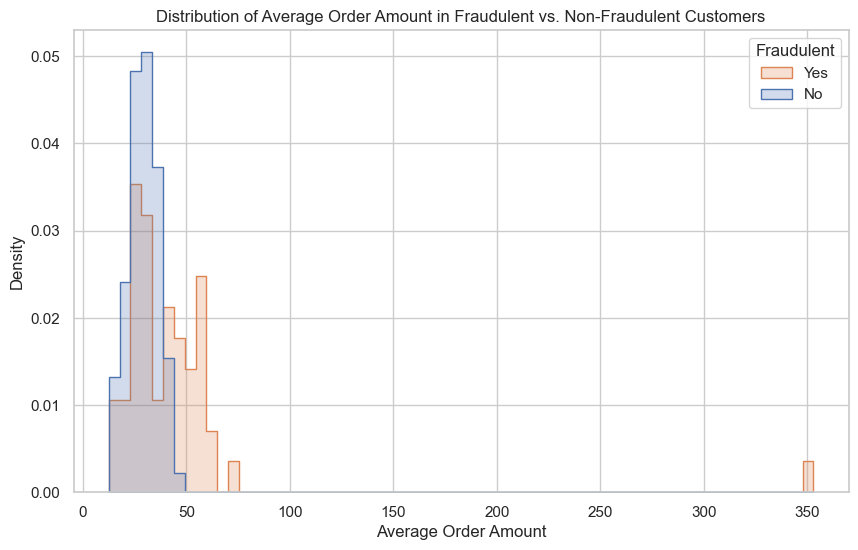

In [40]:
# Histogram for Average Order Amount in fraudulent vs. non-fraudulent customers
plt.figure(figsize=(10, 6))
sns.histplot(data, x='avg_order_amount', hue='fraudulent', element='step', stat='density', common_norm=False)
plt.title('Distribution of Average Order Amount in Fraudulent vs. Non-Fraudulent Customers')
plt.xlabel('Average Order Amount')
plt.ylabel('Density')
plt.legend(title='Fraudulent', labels=['Yes', 'No'])
plt.show()


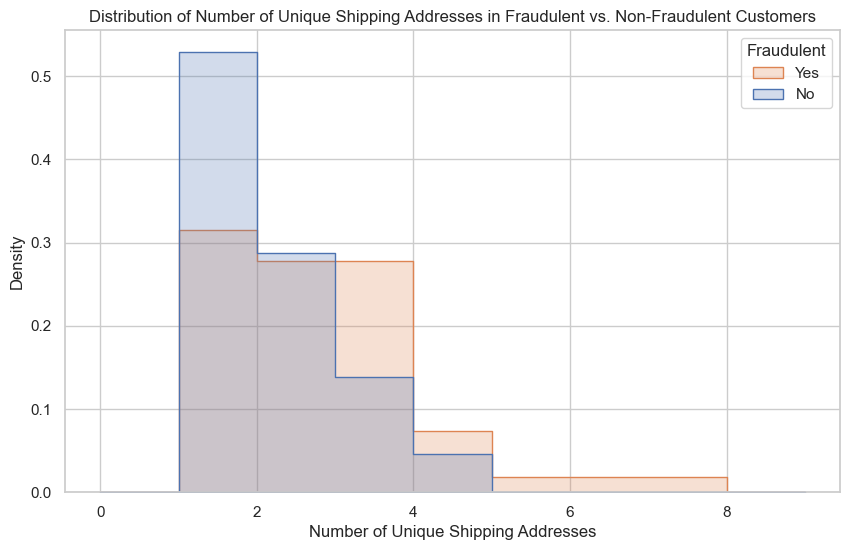

In [41]:
# Histogram for Number of Unique Issuers in fraudulent vs. non-fraudulent customers
plt.figure(figsize=(10, 6))
sns.histplot(data, x='num_unique_shipping_addresses', hue='fraudulent', element='step', stat='density', common_norm=False, bins=range(int(data['unique_issuers'].max())+1))
plt.title('Distribution of Number of Unique Shipping Addresses in Fraudulent vs. Non-Fraudulent Customers')
plt.xlabel('Number of Unique Shipping Addresses')
plt.ylabel('Density')
plt.legend(title='Fraudulent', labels=['Yes', 'No'])
plt.show()

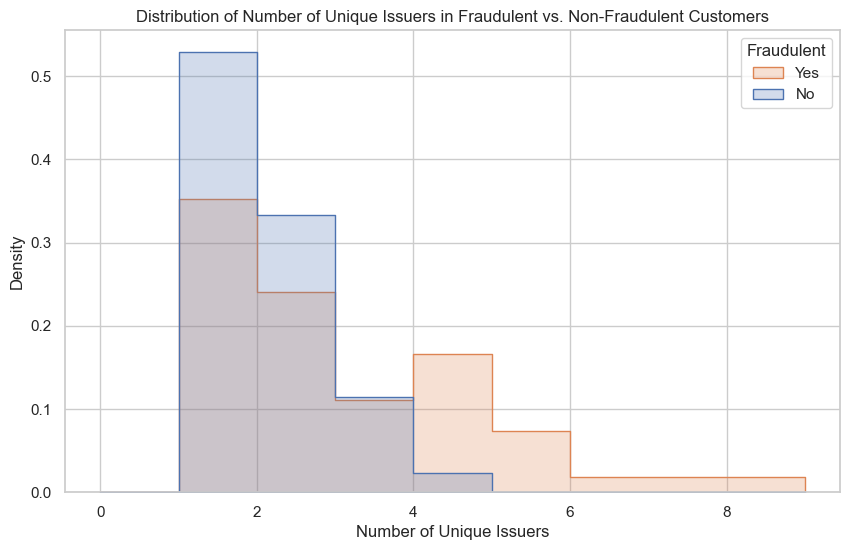

In [42]:
# Histogram for Number of Unique Issuers in fraudulent vs. non-fraudulent customers
plt.figure(figsize=(10, 6))
sns.histplot(data, x='unique_issuers', hue='fraudulent', element='step', stat='density', common_norm=False, bins=range(int(data['unique_issuers'].max())+1))
plt.title('Distribution of Number of Unique Issuers in Fraudulent vs. Non-Fraudulent Customers')
plt.xlabel('Number of Unique Issuers')
plt.ylabel('Density')
plt.legend(title='Fraudulent', labels=['Yes', 'No'])
plt.show()


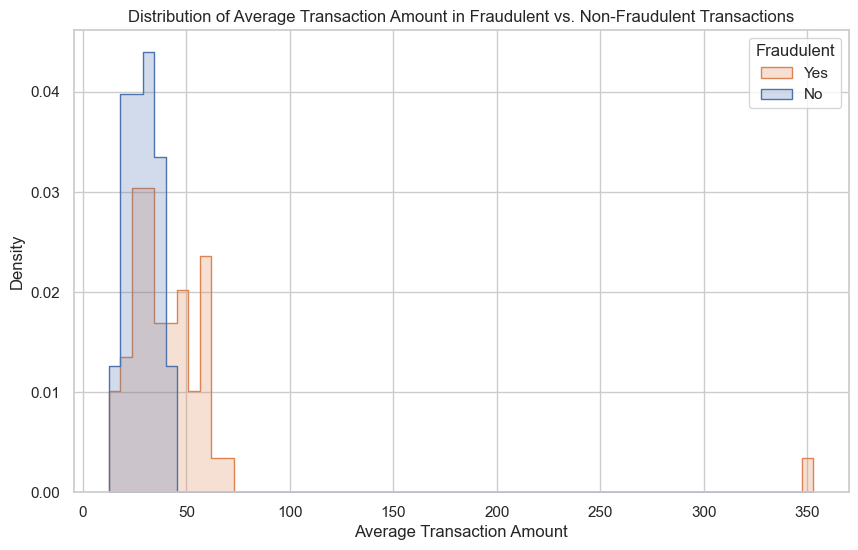

In [43]:
# Histogram for Average Transaction Amount in fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(data, x='avg_transaction_amount', hue='fraudulent', element='step', stat='density', common_norm=False)
plt.title('Distribution of Average Transaction Amount in Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Density')
plt.legend(title='Fraudulent', labels=['Yes', 'No'])
plt.show()


## Analysis of the catergorical variables

In [44]:
# List of categorical variables to analyze
categorical_vars = [
    'type_apple pay', 'type_card', 'type_paypal', 'type_bitcoin', 
    'provider_American Express', 'provider_VISA 16 digit', 'provider_VISA 13 digit', 
    'provider_Maestro', 'provider_JCB 15 digit', 'provider_Mastercard', 
    'provider_Voyager', 'provider_Diners Club / Carte Blanche', 
    'provider_Discover', 'provider_JCB 16 digit'
]

# Calculating proportions of each category for fraudulent and non-fraudulent transactions
categorical_summary_fraud = data.groupby('fraudulent')[categorical_vars].apply(lambda x: x.mean())

categorical_summary_fraud



,type_apple pay,type_card,type_paypal,type_bitcoin,provider_American Express,provider_VISA 16 digit,provider_VISA 13 digit,provider_Maestro,provider_JCB 15 digit,provider_Mastercard,provider_Voyager,provider_Diners Club / Carte Blanche,provider_Discover,provider_JCB 16 digit
fraudulent,,,,,,,,,,,,,,
0,0.126437,0.816092,0.206897,0.114943,0.114943,0.241379,0.126437,0.206897,0.114943,0.080460,0.149425,0.160920,0.149425,0.252874
1,0.277778,0.925926,0.185185,0.240741,0.203704,0.425926,0.259259,0.203704,0.166667,0.148148,0.296296,0.259259,0.166667,0.481481


The analysis of categorical variables in relation to the fraudulent variable shows the following key points:

<b>Payment Types:</b>

<u>Apple Pay (type_apple pay):</u>

Used more in fraudulent transactions (27.78%) compared to non-fraudulent ones (12.64%).

<u>Card Payments (type_card):</u>

More prevalent in fraudulent transactions (92.59%) than in non-fraudulent transactions (81.61%).

<u>PayPal (type_paypal):</u>

Similar usage in fraudulent (18.52%) and non-fraudulent transactions (20.69%).

<u>Bitcoin (type_bitcoin):</u>

Significantly higher usage in fraudulent transactions (24.07%) compared to non-fraudulent ones (11.49%).

<b>Card Providers:</b>

<u>American Express (provider_American Express):</u>

More frequently used in fraudulent transactions (20.37%) compared to non-fraudulent ones (11.49%).

<u>VISA 16 Digit (provider_VISA 16 digit):</u>

Higher usage in fraudulent transactions (42.59%) than in non-fraudulent transactions (24.14%).

<u>VISA 13 Digit (provider_VISA 13 digit):</u>

More common in fraudulent transactions (25.93%) compared to non-fraudulent ones (12.64%).

<u>Maestro (provider_Maestro):</u>

Similar usage in both fraudulent (20.37%) and non-fraudulent transactions (20.69%).

<u>JCB 15 Digit (provider_JCB 15 digit):</u>

Slightly more common in fraudulent transactions (16.67%) than in non-fraudulent transactions (11.49%).

<u>Mastercard (provider_Mastercard):</u>

More frequently used in fraudulent transactions (14.81%) compared to non-fraudulent ones (8.05%).

<u>Voyager (provider_Voyager):</u>

Higher usage in fraudulent transactions (29.63%) compared to non-fraudulent ones (14.94%).

<u>Diners Club / Carte Blanche (provider_Diners Club / Carte Blanche):</u>

More common in fraudulent transactions (25.93%) than in non-fraudulent ones (16.09%).

<u>Discover (provider_Discover):</u>

Similar usage in both fraudulent (16.67%) and non-fraudulent transactions (16.09%).

<u>JCB 16 Digit (provider_JCB 16 digit):</u>

Significantly more common in fraudulent transactions (48.15%) than in non-fraudulent transactions (25.29%).

In [45]:
from scipy.stats import chi2_contingency

# Function to perform Chi-Squared test and return p-value
def perform_chi2_test(data, variable):
    contingency_table = pd.crosstab(data[variable], data['fraudulent'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# Variables to test (excluding 'unique_issuers')
test_vars = [
    'type_apple pay', 'type_card', 'type_paypal', 'type_bitcoin', 
    'provider_American Express', 'provider_VISA 16 digit', 'provider_VISA 13 digit', 
    'provider_Maestro', 'provider_JCB 15 digit', 'provider_Mastercard', 
    'provider_Voyager', 'provider_Diners Club / Carte Blanche', 'provider_Discover', 
    'provider_JCB 16 digit'
]

# Dictionary to hold p-values for each test
chi2_p_values = {}

# Performing the Chi-Squared test for each variable
for var in test_vars:
    chi2_p_values[var] = perform_chi2_test(data, var)

chi2_p_values



{'type_apple pay': 0.04243234068891076,
 'type_card': 0.11667308354312161,
 'type_paypal': 0.9227133330815527,
 'type_bitcoin': 0.0834718167823109,
 'provider_American Express': 0.2317773355077603,
 'provider_VISA 16 digit': 0.03467280685368424,
 'provider_VISA 13 digit': 0.07497426249729432,
 'provider_Maestro': 1.0,
 'provider_JCB 15 digit': 0.5347935604015202,
 'provider_Mastercard': 0.32399893457500467,
 'provider_Voyager': 0.05967919926412756,
 'provider_Diners Club / Carte Blanche': 0.22790393200591264,
 'provider_Discover': 0.9716400074361485,
 'provider_JCB 16 digit': 0.009268016552201512}

To statistically test the differences in card providers and payment types between fraudulent and non-fraudulent customers, the Chi-Squared test of independence is appropriate. This test is used when you have two categorical variables from a single population and want to see if there is a significant association between them.

Here, our categorical variables are the fraud status (fraudulent or non-fraudulent) and the various payment types/card providers. The Chi-Squared test will help us determine whether the observed differences in the proportions of payment types and card providers are statistically significant or not.

Based on the results of the Chi-Squared tests for payment types and card providers, here are the key insights:

<b>Payment Types:</b>

- Apple Pay (type_apple pay): p-value of 0.04 suggests a statistically significant association with fraudulent transactions.


<b>Card Providers:</b>

- VISA 16 digit (provider_VISA 16 digit): p-value of 0.03 suggests a statistically significant association with fraudulent transactions.

- Voyager (provider_Voyager): p-value of 0.0591, slightly above the typical alpha level of 0.05, suggesting a possible but not statistically significant association with fraud.

- JCB 16 digit (provider_JCB 16 digit): p-value of 0.009 suggests a statistically significant association with fraudulent transactions.


<u>In summary:</u>

There is a statistically significant association between fraudulent transactions and the use of apple pay, VISA 16 digit, and JCB 16 digit.
Other payment types and card providers do not show a statistically significant association with fraudulent transactions.

Below graphs for the statistically significant variables

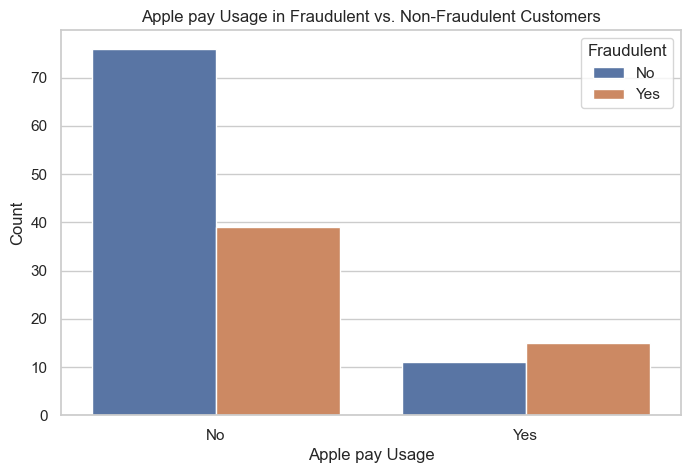

In [47]:
# Graph for Apple pay usage in fraudulent vs. non-fraudulent customers
plt.figure(figsize=(8, 5))
sns.countplot(x='type_apple pay', hue='fraudulent', data=data)
plt.title('Apple pay Usage in Fraudulent vs. Non-Fraudulent Customers')
plt.xlabel('Apple pay Usage')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()


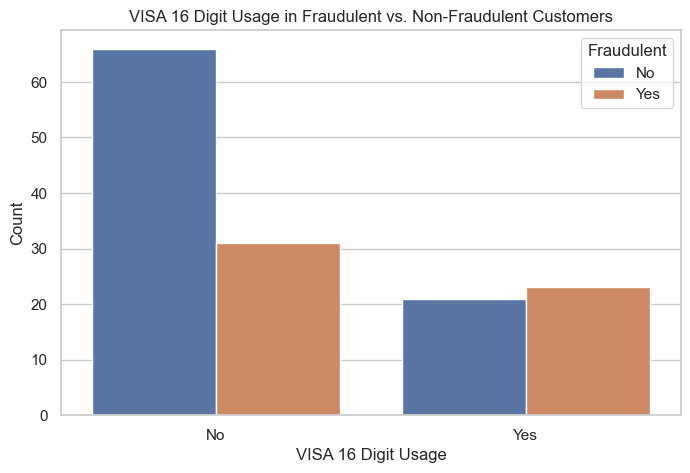

In [48]:
# Graph for VISA 16 digit usage in fraudulent vs. non-fraudulent customers
plt.figure(figsize=(8, 5))
sns.countplot(x='provider_VISA 16 digit', hue='fraudulent', data=data)
plt.title('VISA 16 Digit Usage in Fraudulent vs. Non-Fraudulent Customers')
plt.xlabel('VISA 16 Digit Usage')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()


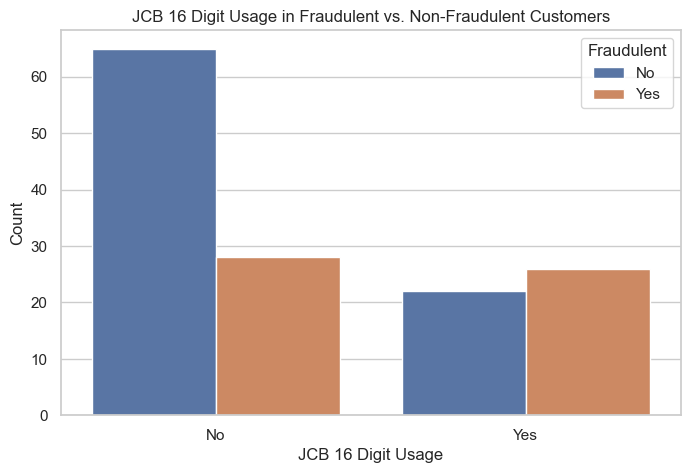

In [49]:
# Graph for JCB 16 digit usage in fraudulent vs. non-fraudulent customers
plt.figure(figsize=(8, 5))
sns.countplot(x='provider_JCB 16 digit', hue='fraudulent', data=data)
plt.title('JCB 16 Digit Usage in Fraudulent vs. Non-Fraudulent Customers')
plt.xlabel('JCB 16 Digit Usage')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()
